## import libaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

## Reading data from csv file

In [6]:
dataframe = pd.read_csv("Classified Data")
dataframe.head(10)

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
5,5,0.833928,1.523302,1.104743,1.021139,1.107377,1.010930,1.279538,1.280677,0.510350,1.528044,0
6,6,0.944705,1.251761,1.074885,0.286473,0.996440,0.428860,0.910805,0.755305,1.111800,1.110842,0
7,7,0.816174,1.088392,0.895343,0.243860,0.943123,1.045131,1.146536,1.341886,1.225324,1.425784,0
8,8,0.776551,1.463812,0.783825,0.337278,0.742215,1.072756,0.880300,1.312951,1.118165,1.225922,0
9,9,0.772280,0.515111,0.891596,0.940862,1.430568,0.885876,1.205231,0.596858,1.542580,0.981879,1


### Let’s see how many of each class is in our data set

In [8]:
dataframe['TARGET CLASS'].value_counts()

TARGET CLASS
1    500
0    500
Name: count, dtype: int64

### Feature set

In [9]:
dataframe.columns
x = dataframe[['WTT', 'PTI','EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF','HQE', 'NXJ']] .values
x[0:5]

array([[0.91391733, 1.16207271, 0.56794585, 0.7554639 , 0.78086157,
        0.35260772, 0.75969691, 0.64379756, 0.87942209, 1.23140944],
       [0.6356319 , 1.00372163, 0.53534235, 0.82564485, 0.92410893,
        0.64845024, 0.67533431, 1.01354599, 0.62155222, 1.4927016 ],
       [0.72135981, 1.20149262, 0.92198973, 0.85559498, 1.52662939,
        0.72078089, 1.62635071, 1.15448315, 0.95787702, 1.28559679],
       [1.2342044 , 1.38672629, 0.65304631, 0.82562445, 1.14250354,
        0.87512792, 1.40970806, 1.38000255, 1.52269205, 1.15309302],
       [1.27949082, 0.94974956, 0.62728004, 0.66897608, 1.2325373 ,
        0.70372744, 1.1155955 , 0.6466907 , 1.46381175, 1.41916658]])

In [10]:
y = dataframe['TARGET CLASS'].values
y[0:5]

array([1, 0, 0, 1, 1], dtype=int64)

### Normalize Data

In [16]:
print (x[0:5])
scaler = preprocessing.StandardScaler().fit(x)
x = scaler.transform(x.astype(float))
print (x[0:5])

[[0.91391733 1.16207271 0.56794585 0.7554639  0.78086157 0.35260772
  0.75969691 0.64379756 0.87942209 1.23140944]
 [0.6356319  1.00372163 0.53534235 0.82564485 0.92410893 0.64845024
  0.67533431 1.01354599 0.62155222 1.4927016 ]
 [0.72135981 1.20149262 0.92198973 0.85559498 1.52662939 0.72078089
  1.62635071 1.15448315 0.95787702 1.28559679]
 [1.2342044  1.38672629 0.65304631 0.82562445 1.14250354 0.87512792
  1.40970806 1.38000255 1.52269205 1.15309302]
 [1.27949082 0.94974956 0.62728004 0.66897608 1.2325373  0.70372744
  1.1155955  0.6466907  1.46381175 1.41916658]]
[[-0.12354188  0.18590747 -0.91343069  0.31962911 -1.03363681 -2.3083747
  -0.79895135 -1.48236813 -0.9497194  -0.64331425]
 [-1.08483602 -0.43034845 -1.02531333  0.62538826 -0.44484713 -1.15270604
  -1.12979749 -0.20224031 -1.82805088  0.63675862]
 [-0.78870217  0.33931821  0.30151137  0.75587279  2.03169299 -0.87015616
   2.59981844  0.28570652 -0.68249379 -0.37784986]
 [ 0.9828405   1.06019327 -0.62139875  0.62529938 

### Train and Test data

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (800, 10) (800,)
Test set: (200, 10) (200,)


## Classification
### K nearest neighbor (KNN)

### import libary

In [18]:
from sklearn.neighbors import KNeighborsClassifier

#### We can calculate the accuracy of KNN for different values of k.

In [21]:
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.92 , 0.895, 0.95 , 0.935, 0.93 , 0.94 , 0.94 , 0.94 , 0.93 ])

#### Plot the model accuracy for a different number of neighbors.

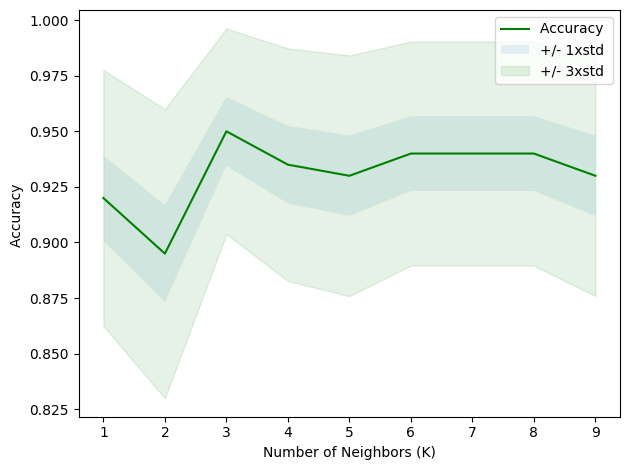

In [22]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [23]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.95 with k= 3


### Training

In [24]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

### Predicting

In [25]:
yhat = neigh.predict(x_test)
print (yhat[0:5])
print (y[0:5])

[1 1 0 1 0]
[1 0 0 1 1]


### Accuracy evaluation

In [26]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat)) 

Train set Accuracy:  0.9575
Test set Accuracy:  0.95


### Test model with new data

In [27]:
nx = [[0.915617, 1.200373, 0.567946 ,0.75894, 0.780862,0.352608, 0.759697, 0.643798, 0.879422, 1.19909]]
nxs = scaler.transform(nx)
neigh.predict(nxs)

array([1], dtype=int64)